In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
from matplotlib import pyplot as plt

from torchsig.utils.visualize import SSLViewVisualizer, complex_spectrogram_to_magnitude
from torchsig.transforms.target_transforms import DescToFamilyIndex

from torchsig.datasets.datamodules import WidebandDataModule, NarrowbandDataModule
from torchsig.datasets.signal_classes import torchsig_signals

In [3]:
def collate_fn(batch) -> tuple[tuple[np.ndarray, np.ndarray], np.ndarray]:
    """Custom collate for 2 views"""

    views, targets = zip(*batch)

    view1s, view2s = zip(*views)

    return (
        np.stack(view1s),
        np.stack(view2s)
    ), np.array(0)

# BYOL

In [9]:
from torchsig.transforms.byol_transform import BYOLTransform
from torchsig.transforms.transforms import Compose, Normalize, Spectrogram, SpectrogramImage

tensor_transform = Compose(
            [
                Spectrogram(
                    nperseg=512,
                    noverlap=0,
                    nfft=512,
                    mode='complex',
                ),
                Normalize(norm=np.inf, flatten=True),
                #SpectrogramImage(),
            ]
        )
byol_transform = BYOLTransform(tensor_transform=tensor_transform)

Wideband

In [10]:

root = "../datasets/wideband"
impaired = True
qa = True
fft_size = 0
num_classes = len(torchsig_signals.class_list)
batch_size = 2
num_workers = 0

datamodule = WidebandDataModule(
    root=root,
    impaired=impaired,
    qa=qa,
    fft_size=fft_size,
    num_classes=num_classes,
    batch_size=batch_size,
    num_workers=num_workers,
    transform=byol_transform,
    target_transform=DescToFamilyIndex(),
    collate_fn=collate_fn,
)

datamodule.prepare_data()
datamodule.setup("fit")

Using WidebandImpairedTrainQAConfig for train.
Dataset already exists in ../datasets/wideband/wideband_impaired_train. Not regenerating
Using WidebandImpairedValQAConfig for val.
Dataset already exists in ../datasets/wideband/wideband_impaired_val. Not regenerating


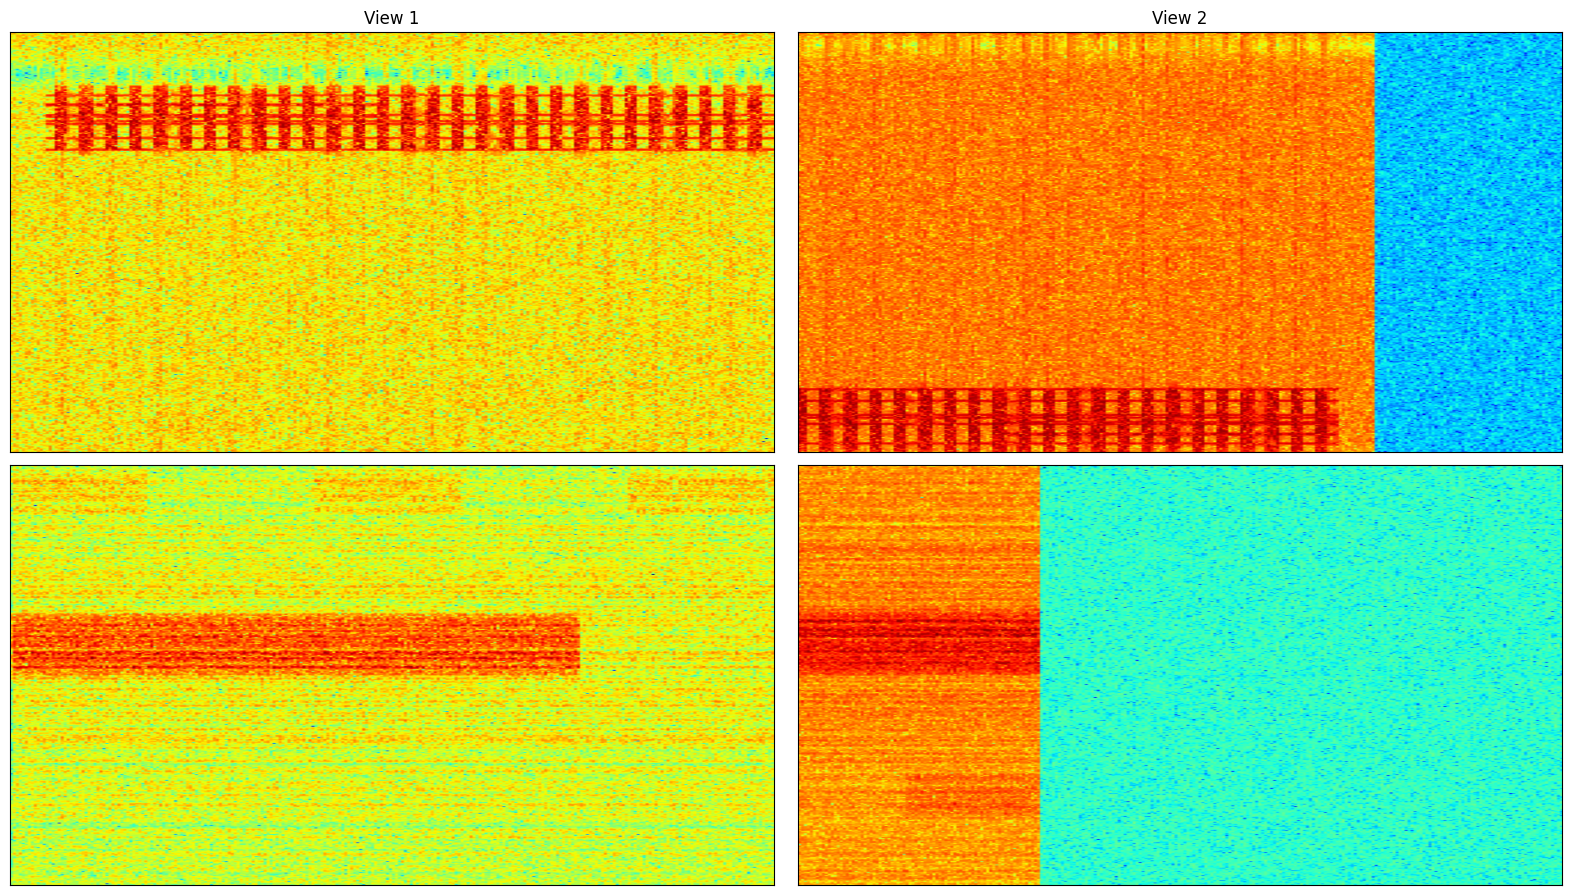

In [11]:
visualizer = SSLViewVisualizer(
    data_loader=datamodule.train_dataloader(),
    visualize_transform=complex_spectrogram_to_magnitude,)

num_batches = 1
for figure in iter(visualizer):
    figure.set_size_inches(16, 9)
    plt.show()
    num_batches -= 1

    if num_batches == 0:
        break

Narrowband

In [12]:

root = "../datasets/narrowband"
impaired = True
qa = True
fft_size = 0
num_classes = len(torchsig_signals.class_list)
batch_size = 2
num_workers = 0

datamodule = NarrowbandDataModule(
    root=root,
    impaired=impaired,
    qa=qa,
    batch_size=batch_size,
    num_workers=num_workers,
    transform=byol_transform,
    target_transform=DescToFamilyIndex(),
    collate_fn=collate_fn,
)

datamodule.prepare_data()
datamodule.setup("fit")

Using NarrowbandImpairedTrainQAConfig for train.
Dataset already exists in ../datasets/narrowband/narrowband_impaired_train. Not regenerating
Using NarrowbandImpairedValQAConfig for val.
Dataset already exists in ../datasets/narrowband/narrowband_impaired_val. Not regenerating


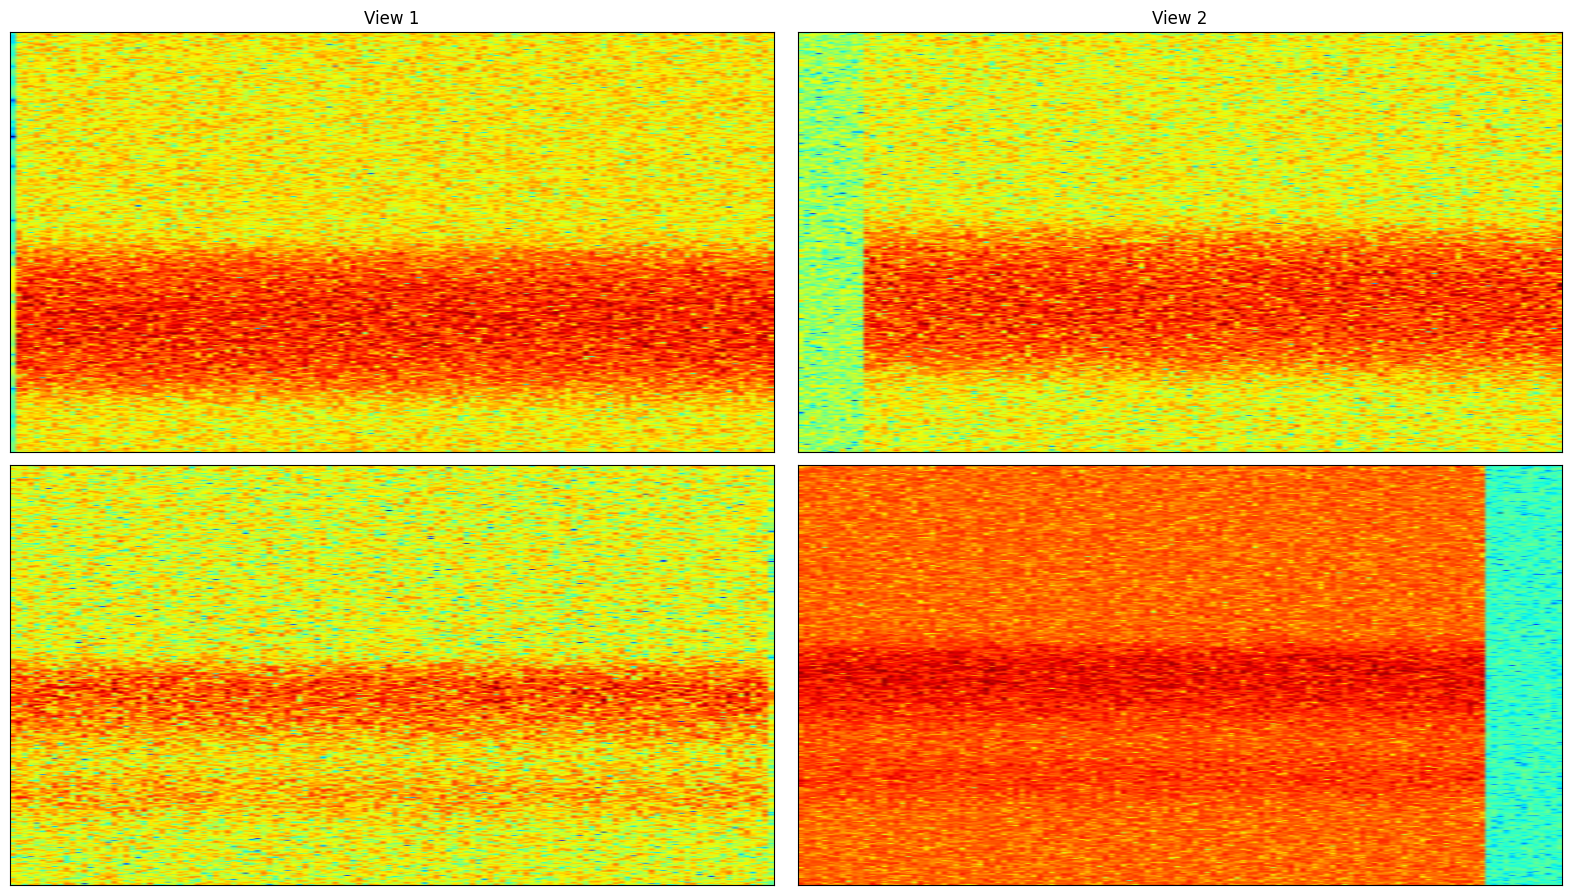

In [19]:
visualizer = SSLViewVisualizer(
    data_loader=datamodule.train_dataloader(),
    visualize_transform=complex_spectrogram_to_magnitude,)

num_batches = 1
for figure in iter(visualizer):
    figure.set_size_inches(16, 9)
    plt.show()
    num_batches -= 1

    if num_batches == 0:
        break